In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import corner

from cmcrameri import cm
from matplotlib.colors import to_hex

from plot_utils import rcparams
plt.rcParams.update(rcparams)

In [2]:
prior_c = '#cccccc'
gp0_c = to_hex('dimgray')
gp2_c = to_hex(cm.roma(0.9))

In [3]:
hist_kwargs = {
    'density': True,
    'lw': 1.5
}

In [4]:
collated_eos_gp0 = pd.read_csv(
    '../data/eos-draws-default/eos-draws-default.csv',
    index_col='eos'
)
collated_eos_gp0_with_ntov = pd.read_csv(
    '../data/eos-draws-default/collated_np_all_post.csv',
    index_col='eos'
)

collated_eos_gp0['R1.4'] = collated_eos_gp0_with_ntov['R(M=1.4)']
collated_eos_gp0['R2'] = collated_eos_gp0_with_ntov['R(M=2.0)']
collated_eos_gp0['Lambda1.4'] = collated_eos_gp0_with_ntov['Lambda(M=1.4)']
collated_eos_gp0['Lmabda2'] = collated_eos_gp0_with_ntov['Lambda(M=2.0)']

astro_weights_gp0 = np.exp(
    collated_eos_gp0.logweight_total - collated_eos_gp0.logweight_total.max()
).values
astro_weights_gp0 /= max(astro_weights_gp0)

ntov_marg_weights_gp0 = np.loadtxt(
    '../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat'
)

In [5]:
gp0_stacked = np.vstack([
    collated_eos_gp0['R1.4'].values,
    collated_eos_gp0['R2'].values,
    collated_eos_gp0['Lambda1.4'].values,
    collated_eos_gp0['Lmabda2'].values,
    collated_eos_gp0['Mmax'].values,
]).T

In [6]:
collated_eos_gp2 = pd.read_csv(
    '../data/eos-draws-modified/gp2/eos-draws-modified-gp2.csv'
)

astro_weights_gp2 = np.exp(
    collated_eos_gp2.logweight_total - collated_eos_gp2.logweight_total.max()
).values
astro_weights_gp2 /= max(astro_weights_gp2)

R14_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_M/radius_1.4.dat',
)
R2_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_M/radius_2.0.dat',
)
Lambda14_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_M/Lambda_1.4.dat',
)
Lambda2_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_M/Lambda_2.0.dat',
)
Mmax_gp2 = collated_eos_gp2['Mmax'].values

In [7]:
gp2_stacked = np.vstack([
    R14_gp2,
    R2_gp2,
    Lambda14_gp2,
    Lambda2_gp2,
    Mmax_gp2,
]).T

In [8]:
R14_lim = (9, 15)
R2_lim = (9, 15)
Lambda14_lim = (0, 1000)
Lambda2_lim = (0, 120)
M_lim = (1.4, 3.5)

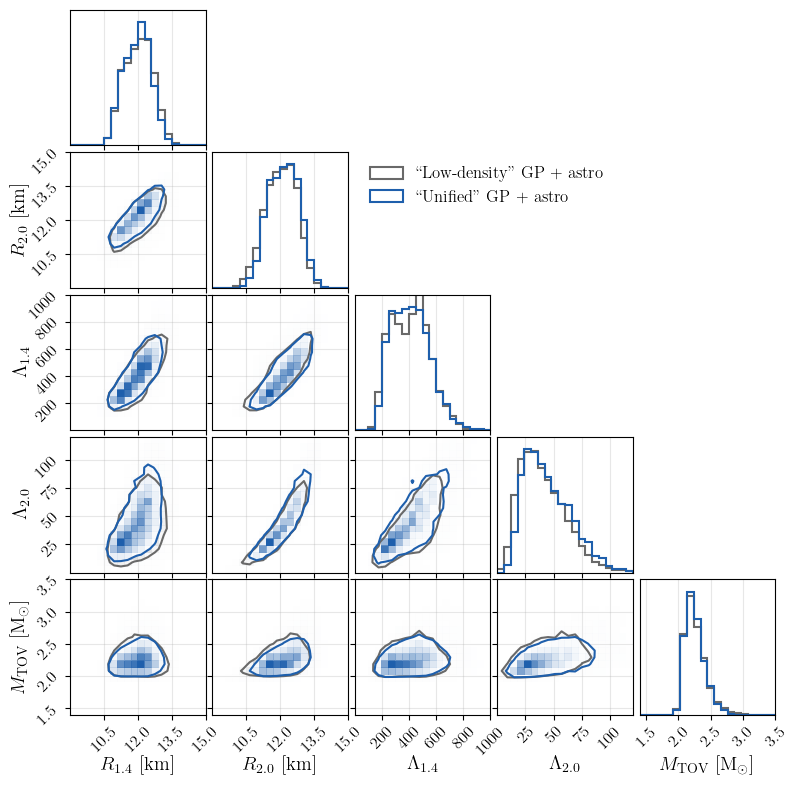

In [9]:
fig, axs = plt.subplots(5, 5, figsize=(8,8))

for ax in axs.flatten():
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

fig = corner.corner(
    gp0_stacked,
    labels=[
        '$R_{1.4}$ [km]',
        '$R_{2.0}$ [km]',
        '$\Lambda_{1.4}$',
        '$\Lambda_{2.0}$',
        '$M_\mathrm{TOV}$ [M$_\odot$]',
    ],
    range=[
        R14_lim,
        R2_lim,
        Lambda14_lim,
        Lambda2_lim,
        M_lim,
    ],
    levels=[0.9],
    weights=astro_weights_gp0,
    plot_datapoints=False,
    color=gp0_c,
    hist_kwargs=hist_kwargs,
    fig=fig
)

ylim_R2 = axs[1,1].get_ylim()

corner.corner(
    gp2_stacked,
    fig=fig,
    range=[
        R14_lim,
        R2_lim,
        Lambda14_lim,
        Lambda2_lim,
        M_lim,
    ],
    levels=[0.9],
    bins=20,
    weights=astro_weights_gp2,
    plot_datapoints=False,
    color=gp2_c,
    hist_kwargs={**hist_kwargs, 'color':gp2_c},
)

axs[1,1].set_ylim(ylim_R2)

handles = [
    mpatches.Patch(fill=None, lw=1.5, edgecolor=gp0_c),
    mpatches.Patch(fill=None, lw=1.5, edgecolor=gp2_c),
]
labels = [
    "``Low-density'' GP + astro",
    "``Unified'' GP + astro"
]
axs[1,2].legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    frameon=False,
);